# Anomaly-Based Fraud Detection in Transactions

# Table of Contents
1. [Problem Definition](#Problem-Definition)
2. [Importing Basic Libraries](#Importing-Basic-Libraries)
3. [Loading Dataset](#Loading-Dataset)
4. [EDA (Exploratory Data Analysis) and Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)
5. [Model Training and Evaluation](#Model-Training-and-Evaluation)
6. [Conclusion](#Conclusion)

# Problem Definition

The goal of this project is to build an anomaly-based fraud detection system for credit card transactions. In this context, an anomaly refers to any transaction that deviates from a cardholder's typical behavior, such as unusual transaction amounts, locations, or timing. These anomalies, which can also include outliers (extreme deviations), are important because fraudulent transactions often exhibit unusual patterns. By detecting these deviations from normal behavior, the system can flag suspicious transactions for further investigation.

Although the dataset may contain labeled fraud data, unsupervised learning is preferred due to the **severe class imbalance**—fraudulent transactions are rare compared to legitimate ones. Unsupervised learning allows the system to identify anomalies without relying on labeled fraud data, making it more adaptable to detecting new fraud patterns. While the model is trained without labels, the labels can still be used for evaluating the model's performance, such as precision, recall, and F2 score, ensuring the flagged transactions are effective for fraud detection.

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Suppress the FutureWarning from Seaborn to avoid clutter
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

The Credit Card Fraud Detection dataset from Kaggle contains transactions made by credit cards, labeled as fraudulent or non-fraudulent.

The dataset includes a Time feature, which represents the number of seconds elapsed between this transaction and the first transaction in the dataset, and the Amount feature, which indicates the purchase amount of the transaction. These two features help identify patterns related to transaction timing and value, which can be useful for detecting fraudulent activities.

The dataset consists of 284,807 rows and 31 columns, with features derived from the original data using Principal Component Analysis (PCA). The 31st column is the Class column, which indicates whether the transaction is fraudulent (1) or not (0)

# Exploratory Data Analysis and Feature Engineering

### Data Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Time,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,7.000000,7.000000,9.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233,-0.425966,1.229658,-0.644269,-0.894286,-0.338262
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737,0.960523,0.141004,1.417964,0.286157,1.119593
V3,2.536347,0.166480,1.773209,1.792993,1.548718,1.141109,0.045371,1.074380,-0.113192,1.044367
V4,1.378155,0.448154,0.379780,-0.863291,0.403034,-0.168252,1.202613,-0.492199,-0.271526,-0.222187
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193,0.420987,0.191881,0.948934,2.669599,0.499361
V6,0.462388,-0.082361,1.800499,1.247203,0.095921,-0.029728,0.272708,0.428118,3.721818,-0.246761
V7,0.239599,-0.078803,0.791461,0.237609,0.592941,0.476201,-0.005159,1.120631,0.370145,0.651583
V8,0.098698,0.085102,0.247676,0.377436,-0.270533,0.260314,0.081213,-3.807864,0.851084,0.069539
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739,-0.568671,0.464960,0.615375,-0.392048,-0.736727


In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.369007e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.500885e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.426963e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df[df['Class'] == 0].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [8]:
df[df['Class'] == 1].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


### Checking And Removing Duplicates

In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1081


In our dataset, the Time column represents the time of the transaction, and since time should be unique for each transaction), any exact duplicates in this column would indicate an issue. Duplicates occurring at the exact same time would be highly unusual or even impossible in a typical real-world setting, as each transaction should have a unique timestamp.

If such duplicates are found, we can consider them either as data errors or potential fraudulent behavior. In either case, it would be appropriate to remove these duplicates to ensure the integrity of the model training process.

In [10]:
# Remove duplicate rows (if any)
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Shape of dataframe after removing duplicates: (283726, 31)


### Handling Missing Values

We convert the inf values to Nan first

In [11]:
numeric_columns = df.drop(columns='Class').select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].replace([float('inf'), -float('inf')], np.nan)

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Feature Selection

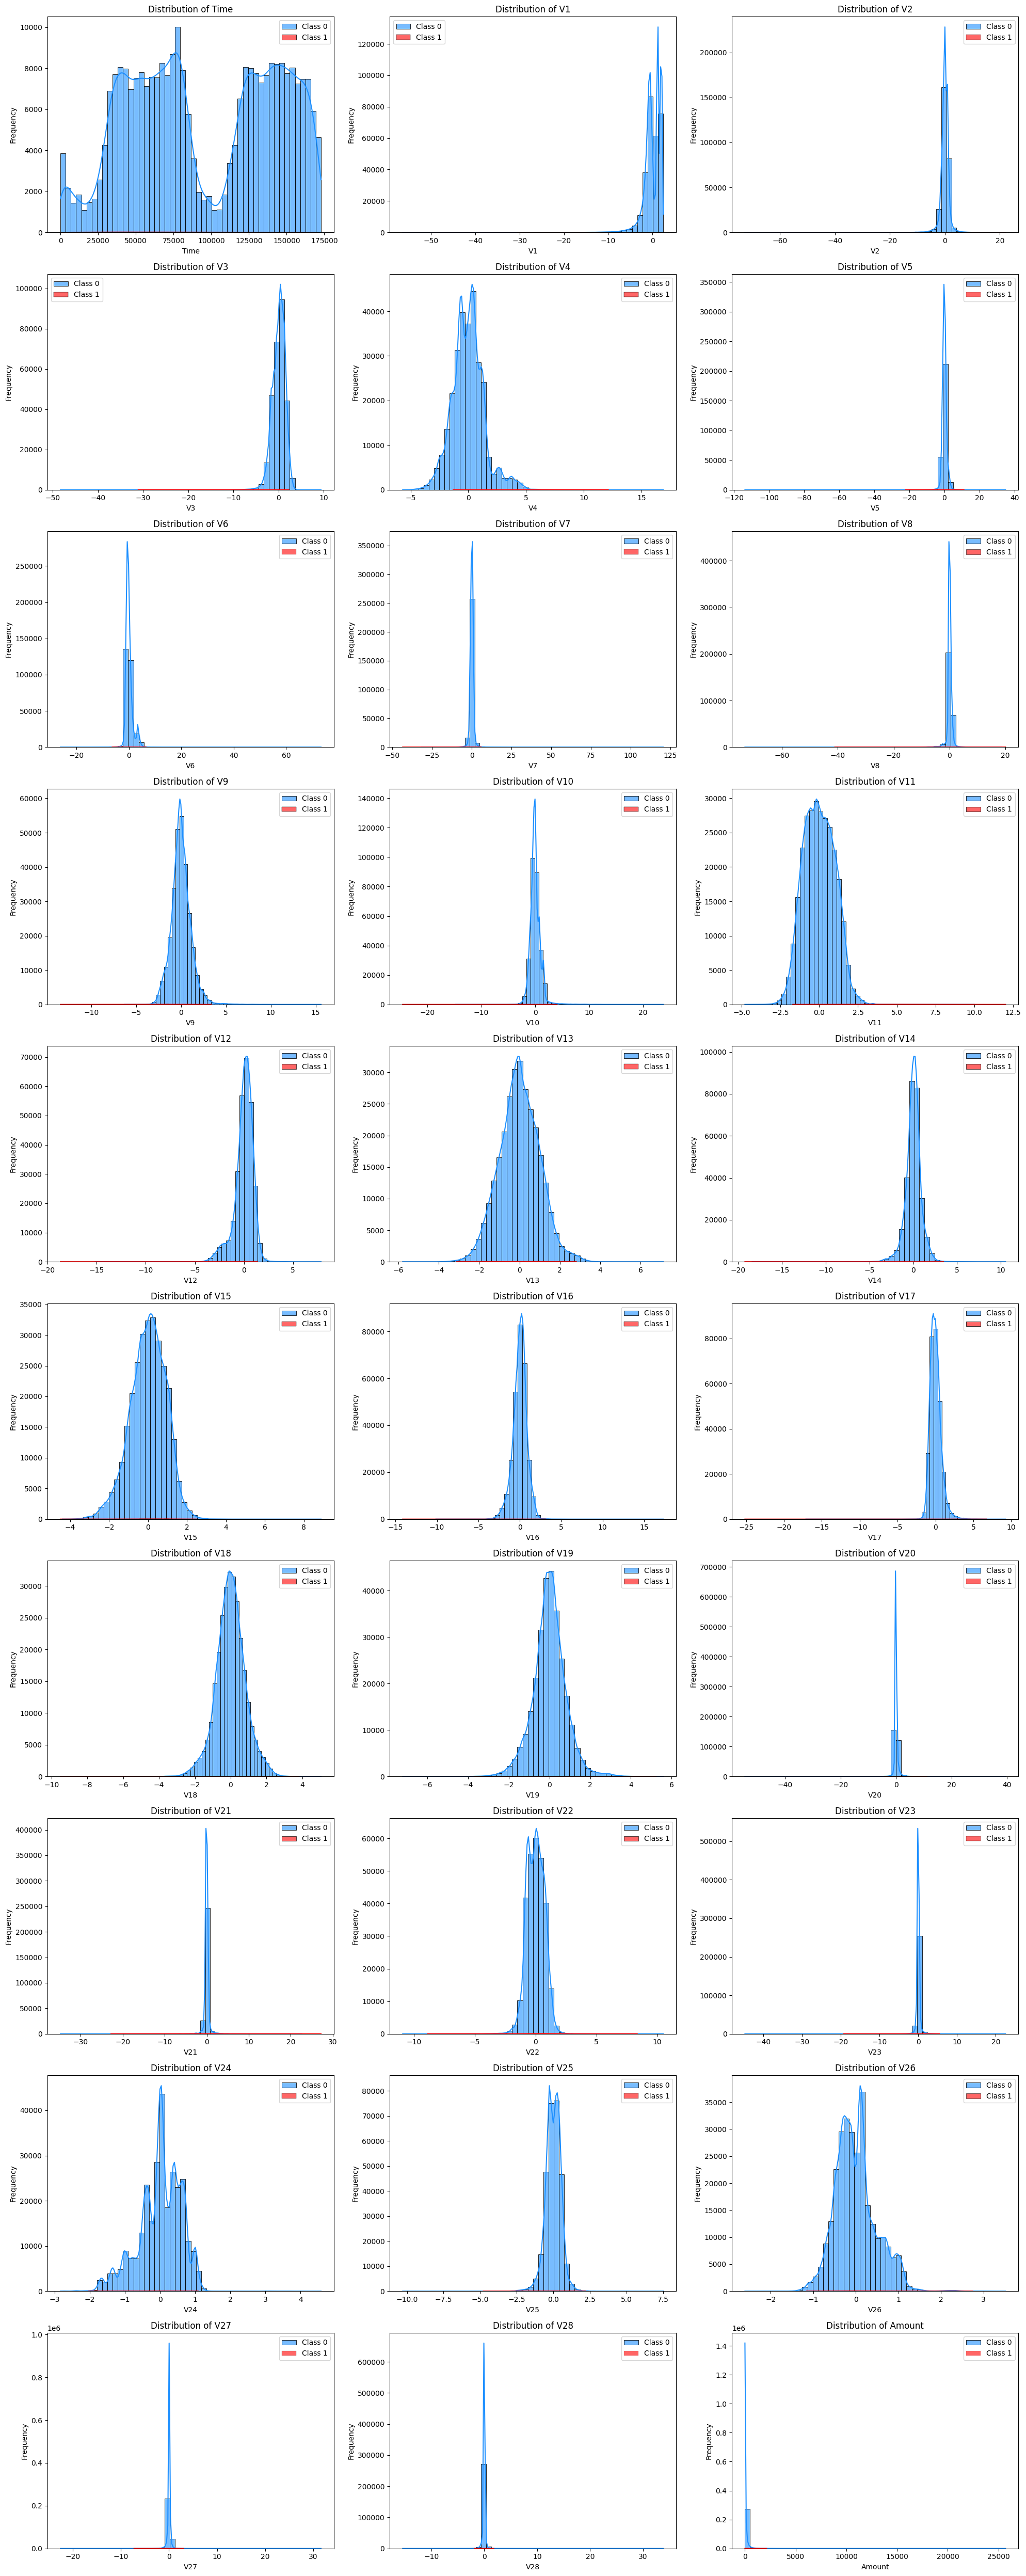

In [13]:
num_columns = 3
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(20, 5 * num_rows))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, idx)
    
    # Plot for Class 0 (Non-Fraud)
    sns.histplot(data=df[df['Class'] == 0], x=column, kde=True, bins=50, color='dodgerblue', alpha=0.6, label='Class 0')
    
    # Plot for Class 1 (Fraud)
    sns.histplot(data=df[df['Class'] == 1], x=column, kde=True, bins=50, color='red', alpha=0.6, label='Class 1')
    
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.legend()

plt.tight_layout()
plt.show()

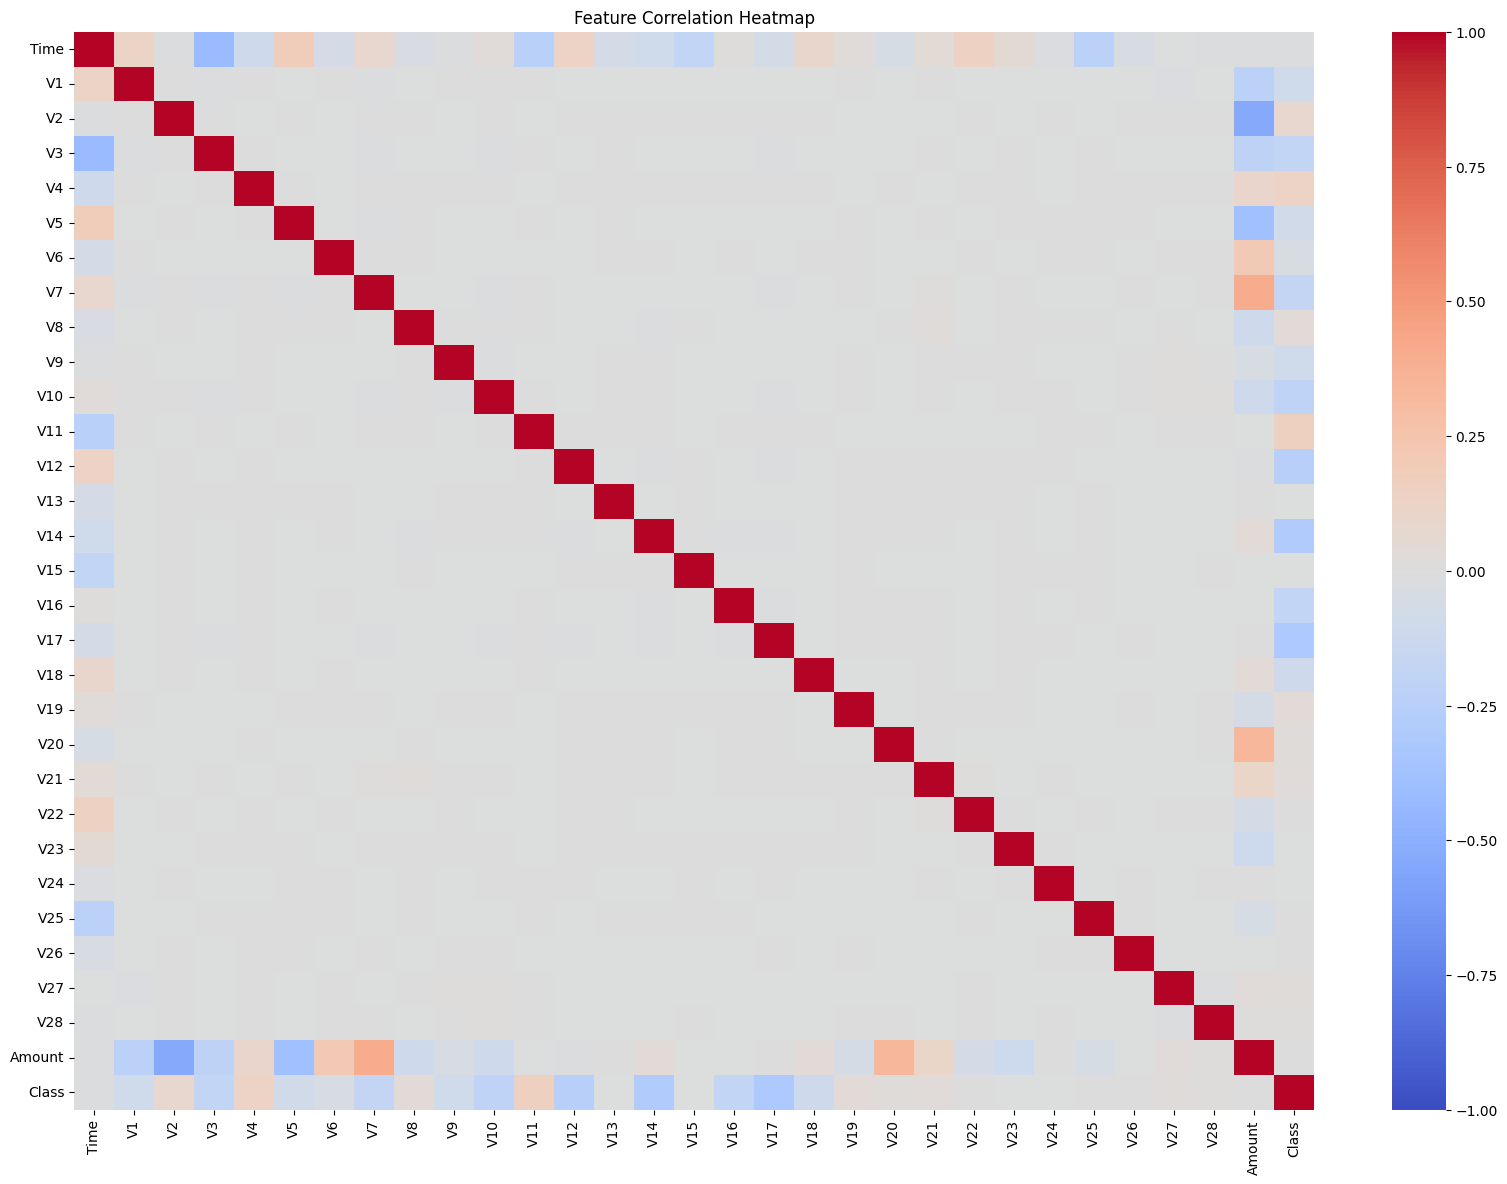

In [14]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

The dataset has redundant features and we will select the features with the highest impacts on anomaly.

In [15]:
# Select top 9 features
selected_features = ['V4', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V15']

df = df[selected_features + ['Class']]
df.head()

,V4,V11,V12,V14,V16,V17,V18,V19,V15,Class
0,1.378155,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,1.468177,0
1,0.448154,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,0.635558,0
2,0.379780,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,2.345865,0
3,-0.863291,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.631418,0
4,0.403034,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.175121,0


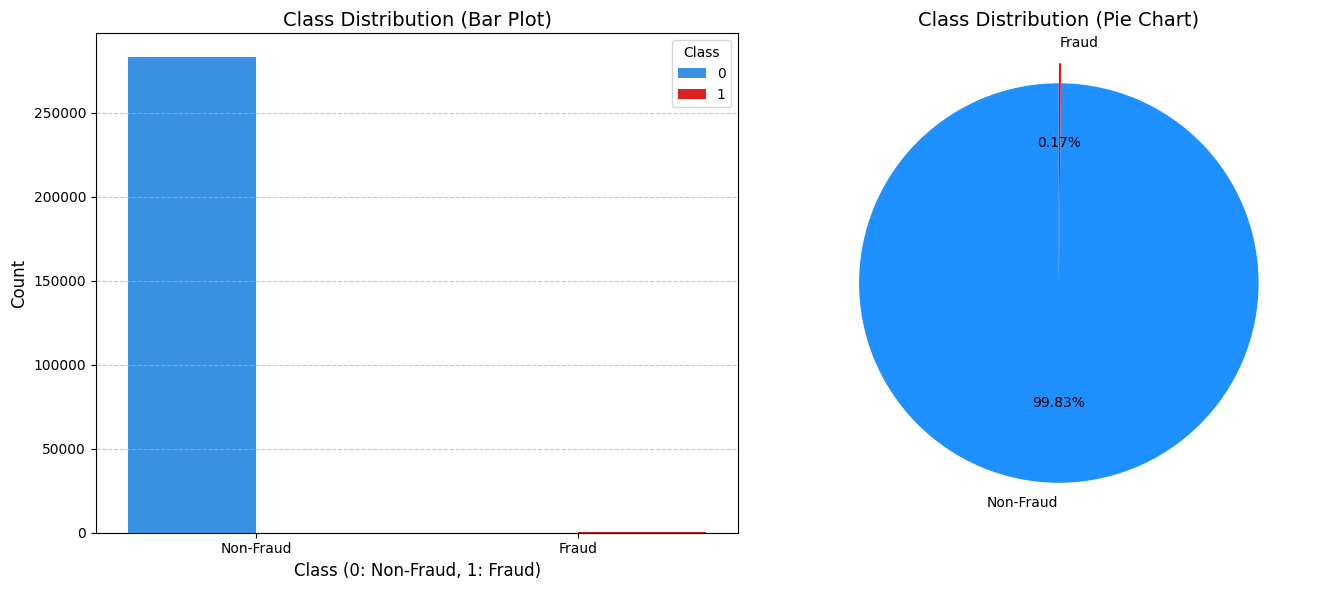

In [16]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(14, 6))

# Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x=class_counts.index,hue=class_counts.index, y=class_counts.values, palette=['dodgerblue', 'red'])
plt.title("Class Distribution (Bar Plot)", fontsize=14)
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=["Non-Fraud", "Fraud"], autopct="%1.2f%%", colors=['dodgerblue', 'red'], startangle=90, explode=[0, 0.1])
plt.title("Class Distribution (Pie Chart)", fontsize=14)

plt.tight_layout()
plt.show()

Only 0.17% of the smaples are fraud. That is an extreme imbalance. Se we will use anomaly detection algorithms instead of supervised learning algorithms.

### Final Data Preparation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud_val, fraud_test = train_test_split(fraud, test_size=0.5, random_state=42)

non_fraud_train, non_fraud_temp = train_test_split(non_fraud, test_size=0.2, random_state=42)
non_fraud_val, non_fraud_test = train_test_split(non_fraud_temp, test_size=0.5, random_state=42)

val_set = pd.concat([fraud_val, non_fraud_val], axis=0).sample(frac=1, random_state=42)  # Shuffle
test_set = pd.concat([fraud_test, non_fraud_test], axis=0).sample(frac=1, random_state=42)  # Shuffle
train_set = non_fraud_train  # Train set contains only non-fraud cases

print(f"Training Set: {train_set.shape}")
print(f"Validation Set: {val_set.shape}")
print(f"Test Set: {test_set.shape}")

print(f"Fraud in Validation Set: {val_set['Class'].sum()}")
print(f"Fraud in Test Set: {test_set['Class'].sum()}")

X_train, y_train = train_set.drop(columns=['Class']), train_set['Class']
X_val, y_val = val_set.drop(columns=['Class']), val_set['Class']
X_test, y_test = test_set.drop(columns=['Class']), test_set['Class']

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Training Set: (226602, 10)
Validation Set: (28561, 10)
Test Set: (28563, 10)
Fraud in Validation Set: 236
Fraud in Test Set: 237


# Model Training and Evaluation

In [18]:
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score, confusion_matrix

In fraud detection, precision and recall are crucial performance metrics. However, given the nature of fraud detection, recall is typically more important than precision. This is because detecting as many fraudulent cases as possible is critical to minimize the risk of undetected fraud. In this context, we use the **F2 score with a beta of 2** to give more weight to recall than precision.

### Isolation Forest

In [19]:
from sklearn.ensemble import IsolationForest

contamination_values = [0.001, 0.005, 0.01, 0.05, 0.1]

f2_scores = []
precisions = []
recalls = []
accuracies = []

for contamination in contamination_values:
    
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X_train, y_train)
    
    y_val_pred = iso_forest.predict(X_val)
    y_val_pred = np.where(y_val_pred == -1, 1, 0)
    
    f2 = fbeta_score(y_val, y_val_pred, beta=5)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    f2_scores.append(f2)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

best_idx = f2_scores.index(max(f2_scores))

best_contamination = contamination_values[best_idx]
best_f2 = f2_scores[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]
best_accuracy = accuracies[best_idx]

print("\nBest Metrics based on F2-Score (val set):")
print(f"Best Contamination: {best_contamination}")
print(f"F2-Score: {best_f2:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")

iso_forest = IsolationForest(contamination=best_contamination, random_state=42)
iso_forest.fit(X_train, y_train)

y_test_pred = iso_forest.predict(X_test)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

f2_test = fbeta_score(y_test, y_test_pred, beta=5)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nMetrics on Test Set:")
print(f"F2-Score: {f2_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")


Best Metrics based on F2-Score (val set):
Best Contamination: 0.005
F2-Score: 0.7823
Precision: 0.5937
Recall: 0.7924
Accuracy: 0.9938

Metrics on Test Set:
F2-Score: 0.8315
Precision: 0.5583
Recall: 0.8481
Accuracy: 0.9932


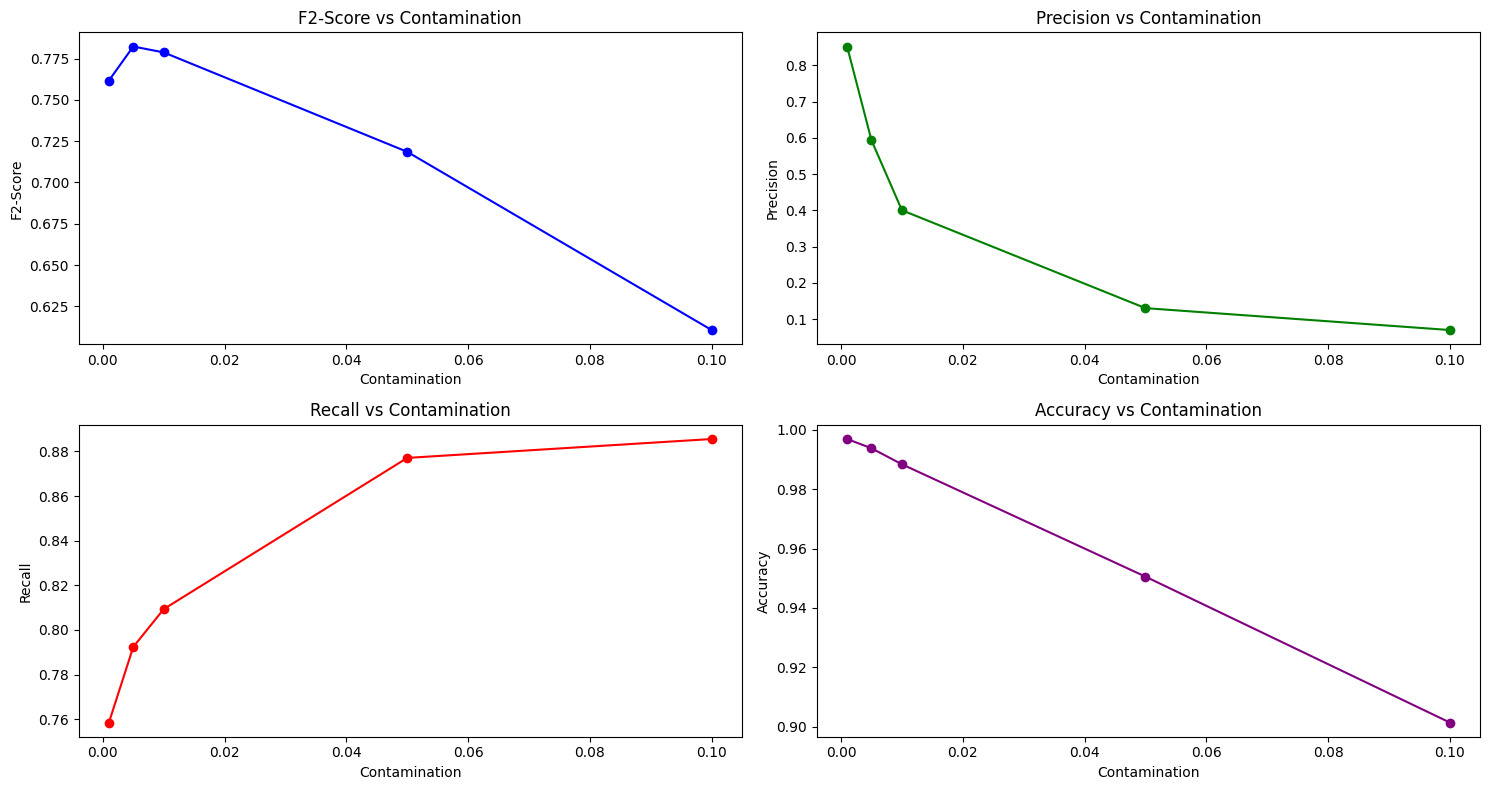

In [20]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(contamination_values, f2_scores, marker='o', color='blue')
plt.title('F2-Score vs Contamination')
plt.xlabel('Contamination')
plt.ylabel('F2-Score')

plt.subplot(2, 2, 2)
plt.plot(contamination_values, precisions, marker='o', color='green')
plt.title('Precision vs Contamination')
plt.xlabel('Contamination')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.plot(contamination_values, recalls, marker='o', color='red')
plt.title('Recall vs Contamination')
plt.xlabel('Contamination')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.plot(contamination_values, accuracies, marker='o', color='purple')
plt.title('Accuracy vs Contamination')
plt.xlabel('Contamination')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

### One Class SVM

In [21]:
from sklearn.svm import OneClassSVM

nu_values = [0.01, 0.05, 0.1]

f2_scores = []
precisions = []
recalls = []
accuracies = []

for nu in nu_values:
    
    svm = OneClassSVM(nu=nu, kernel='rbf', gamma='scale')
    svm.fit(X_train)
    
    y_val_pred = svm.predict(X_val)
    y_val_pred = np.where(y_val_pred == -1, 1, 0)
    
    f2 = fbeta_score(y_val, y_val_pred, beta=5)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    f2_scores.append(f2)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

best_idx = f2_scores.index(max(f2_scores))

best_nu = nu_values[best_idx]
best_f2 = f2_scores[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]
best_accuracy = accuracies[best_idx]

print("\nBest Metrics based on F2-Score (val set):")
print(f"Best Nu: {best_nu}")
print(f"F2-Score: {best_f2:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")

svm = OneClassSVM(nu=best_nu, kernel='rbf', gamma='scale')
svm.fit(X_train)

y_test_pred = svm.predict(X_test)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

f2_test = fbeta_score(y_test, y_test_pred, beta=5)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nMetrics on Test Set:")
print(f"F2-Score: {f2_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")


Best Metrics based on F2-Score (val set):
Best Nu: 0.01
F2-Score: 0.7869
Precision: 0.4046
Recall: 0.8178
Accuracy: 0.9886

Metrics on Test Set:
F2-Score: 0.8218
Precision: 0.3856
Recall: 0.8608
Accuracy: 0.9875


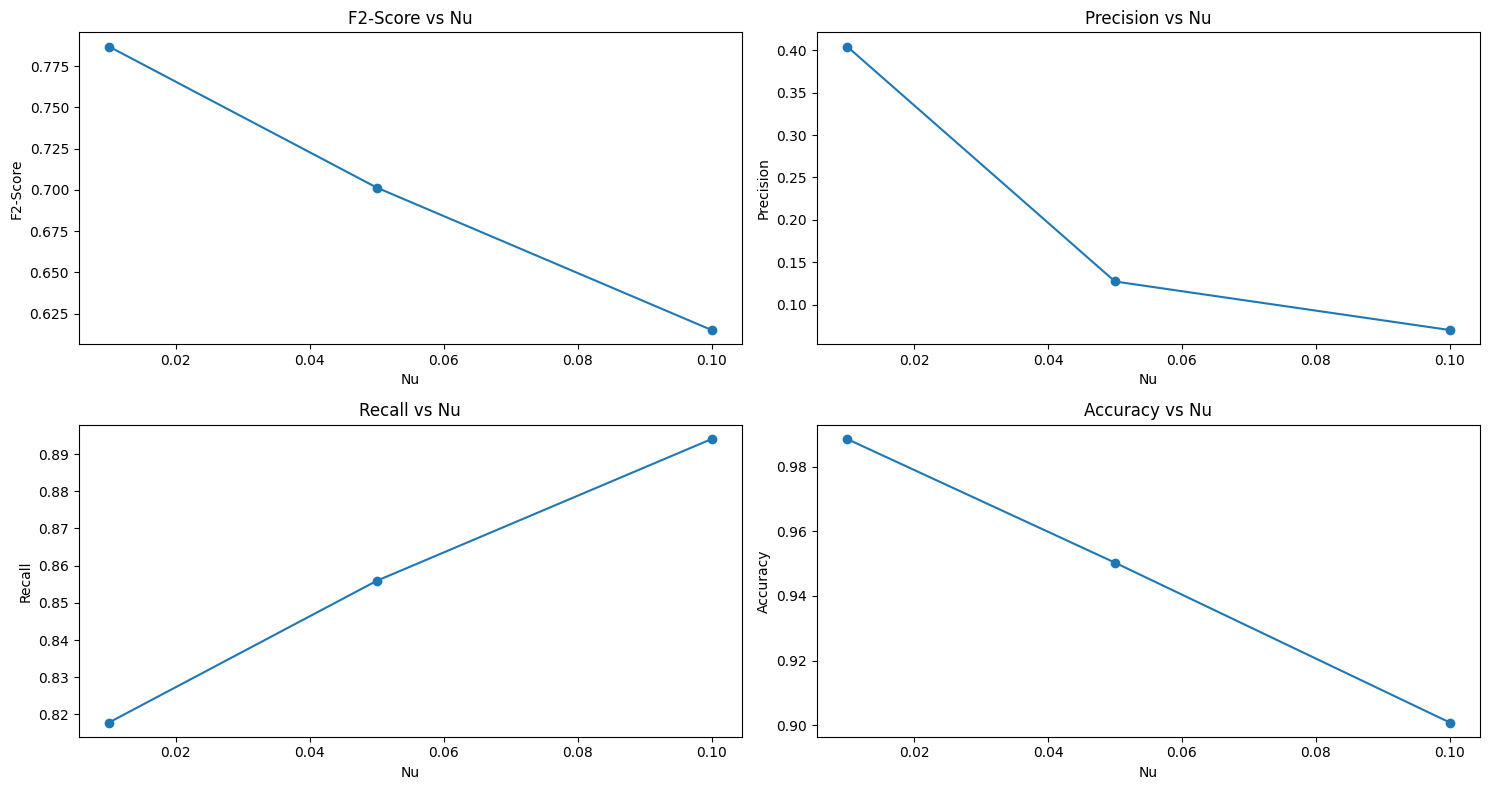

In [22]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(nu_values, f2_scores, marker='o', linestyle='-')
plt.xlabel('Nu')
plt.ylabel('F2-Score')
plt.title('F2-Score vs Nu')

plt.subplot(2, 2, 2)
plt.plot(nu_values, precisions, marker='o', linestyle='-')
plt.xlabel('Nu')
plt.ylabel('Precision')
plt.title('Precision vs Nu')

plt.subplot(2, 2, 3)
plt.plot(nu_values, recalls, marker='o', linestyle='-')
plt.xlabel('Nu')
plt.ylabel('Recall')
plt.title('Recall vs Nu')

plt.subplot(2, 2, 4)
plt.plot(nu_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Nu')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Nu')

plt.tight_layout()
plt.show()

### PDF (probability density function)

The GaussianAnomalyDetector is an unsupervised anomaly detection model that assumes each feature in the dataset follows a Gaussian (normal) distribution. By estimating the mean and standard deviation of each feature, the model computes the probability density of new observations and classifies them as normal or anomalous based on a threshold (epsilon).

This approach is particularly useful for fraud detection, where fraudulent transactions are considered anomalies that significantly deviate from normal behavior.

In [23]:
class GaussianAnomalyDetector:
    def __init__(self):
        self.mu = None
        self.sigma = None
        self.epsilon = None

    def fit(self, X_train):
        """Estimate mean and standard deviation for each feature."""
        self.mu = X_train.mean()
        self.sigma = X_train.std()
        assert np.all(self.sigma > 0), "All standard deviations must be positive"

    def pdf(self, x):
        """Compute the probability density function for a given observation."""
        exponent = np.exp(-0.5 * ((x - self.mu) / self.sigma) ** 2)
        return (1 / (self.sigma * np.sqrt(2 * np.pi))) * exponent

    def predict(self, X, epsilon):
        """Predict anomalies based on a probability threshold."""
        probs = np.prod(self.pdf(X), axis=1)
        return (probs < epsilon).astype(int)

In [24]:
thresholds = thresholds = [1e-25, 1e-20, 1e-19, 1e-18, 1e-17,  1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10]

f2_scores = []
f1_scores = []
precisions = []
recalls = []
accuracies = []

detector = GaussianAnomalyDetector()
detector.fit(X_train)

for threshold in thresholds:
    y_val_pred = detector.predict(X_val, threshold)
    
    f2 = fbeta_score(y_val, y_val_pred, beta=5)
    f1 = fbeta_score(y_val, y_val_pred, beta=1)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    f2_scores.append(f2)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

best_idx = f2_scores.index(max(f2_scores))

best_threshold = thresholds[best_idx]
best_f2 = f2_scores[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]
best_accuracy = accuracies[best_idx]

print("\nBest Metrics based on F2-Score (val set):")
print(f"Best Threshold: {best_threshold}")
print(f"F2-Score: {best_f2:.4f}")
print(f"F1-Score: {best_f1:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")

probs_test = np.prod(detector.pdf(X_test), axis=1)

y_test_pred = np.where(probs_test < best_threshold, 1, 0)

f2_test = fbeta_score(y_test, y_test_pred, beta=5)
f1_test = fbeta_score(y_test, y_test_pred, beta=1)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nMetrics on Test Set:")
print(f"F2-Score: {f2_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")


Best Metrics based on F2-Score (val set):
Best Threshold: 1e-18
F2-Score: 0.8047
F1-Score: 0.8000
Precision: 0.7950
Recall: 0.8051
Accuracy: 0.9967

Metrics on Test Set:
F2-Score: 0.8521
F1-Score: 0.8024
Precision: 0.7546
Recall: 0.8565
Accuracy: 0.9965


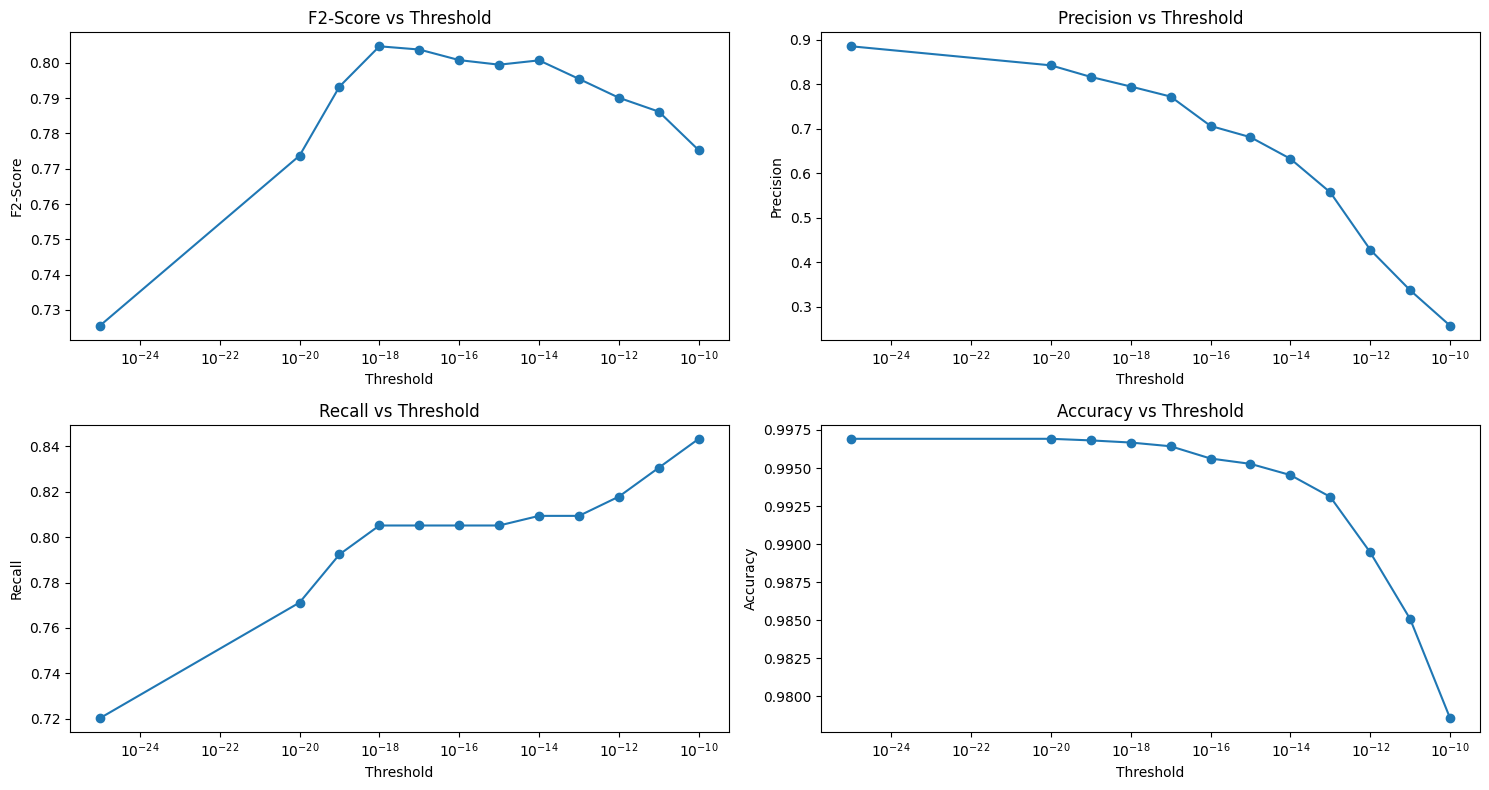

In [25]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(thresholds, f2_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('F2-Score')
plt.title('F2-Score vs Threshold')

plt.subplot(2, 2, 2)
plt.plot(thresholds, precisions, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold')

plt.subplot(2, 2, 3)
plt.plot(thresholds, recalls, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')

plt.subplot(2, 2, 4)
plt.plot(thresholds, accuracies, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')

plt.tight_layout()
plt.show()

### Autoencoders

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Define the Autoencoder model
input_dim = X_train.shape[1]

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(6, activation='relu'),  # Bottleneck
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             102 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,703 (26.18 KB)

 Trainable params: 6,703 (26.18 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=256,
                          validation_split=0.1,
                          callbacks=[early_stopping, lr_scheduler],
                          verbose=1)

Epoch 1/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4847 - val_loss: 0.1355 - learning_rate: 0.0010
Epoch 2/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1202 - val_loss: 0.1055 - learning_rate: 0.0010
Epoch 3/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0993 - val_loss: 0.0914 - learning_rate: 0.0010
Epoch 4/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0874 - val_loss: 0.0841 - learning_rate: 0.0010
Epoch 5/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0806 - val_loss: 0.0786 - learning_rate: 0.0010
Epoch 6/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0767 - val_loss: 0.0790 - learning_rate: 0.0010
Epoch 7/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0733 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 8/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0701 - val_loss: 0.0727 - learning_rate: 0.0010
Epoch 9/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0681 - val_loss: 0.0690 - learning_rate: 0.0010
E

In [28]:
def compute_reconstruction_error(model, data):
    reconstructions = model.predict(data)
    mse = np.mean(np.square(data - reconstructions), axis=1)
    return mse

val_errors = compute_reconstruction_error(autoencoder, X_val)
test_errors = compute_reconstruction_error(autoencoder, X_test)

# Threshold tuning on original val set (with frauds) using F2-score (beta=2)
threshold_values = np.percentile(val_errors, np.linspace(80, 99, 20))  # Range of thresholds
f2_scores = []
precisions = []
recalls = []
accuracies = []

for threshold in threshold_values:
    y_val_pred = (val_errors > threshold).astype(int)
    f2 = fbeta_score(y_val, y_val_pred, beta=2)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    f2_scores.append(f2)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Find best threshold based on F2-score
best_idx = f2_scores.index(max(f2_scores))
best_threshold = threshold_values[best_idx]
best_f2 = f2_scores[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]
best_accuracy = accuracies[best_idx]

print("\nBest Metrics based on F2-Score (val set with frauds):")
print(f"Best Threshold: {best_threshold:.4f}")
print(f"F2-Score: {best_f2:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")

# Evaluate on test set with best threshold
y_test_pred = (test_errors > best_threshold).astype(int)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nMetrics on Test Set:")
print(f"F2-Score: {f2_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")

893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Best Metrics based on F2-Score (val set with frauds):
Best Threshold: 0.4542
F2-Score: 0.6382
Precision: 0.5490
Recall: 0.6653
Accuracy: 0.9927

Metrics on Test Set:
F2-Score: 0.6230
Precision: 0.5464
Recall: 0.6456
Accuracy: 0.9926


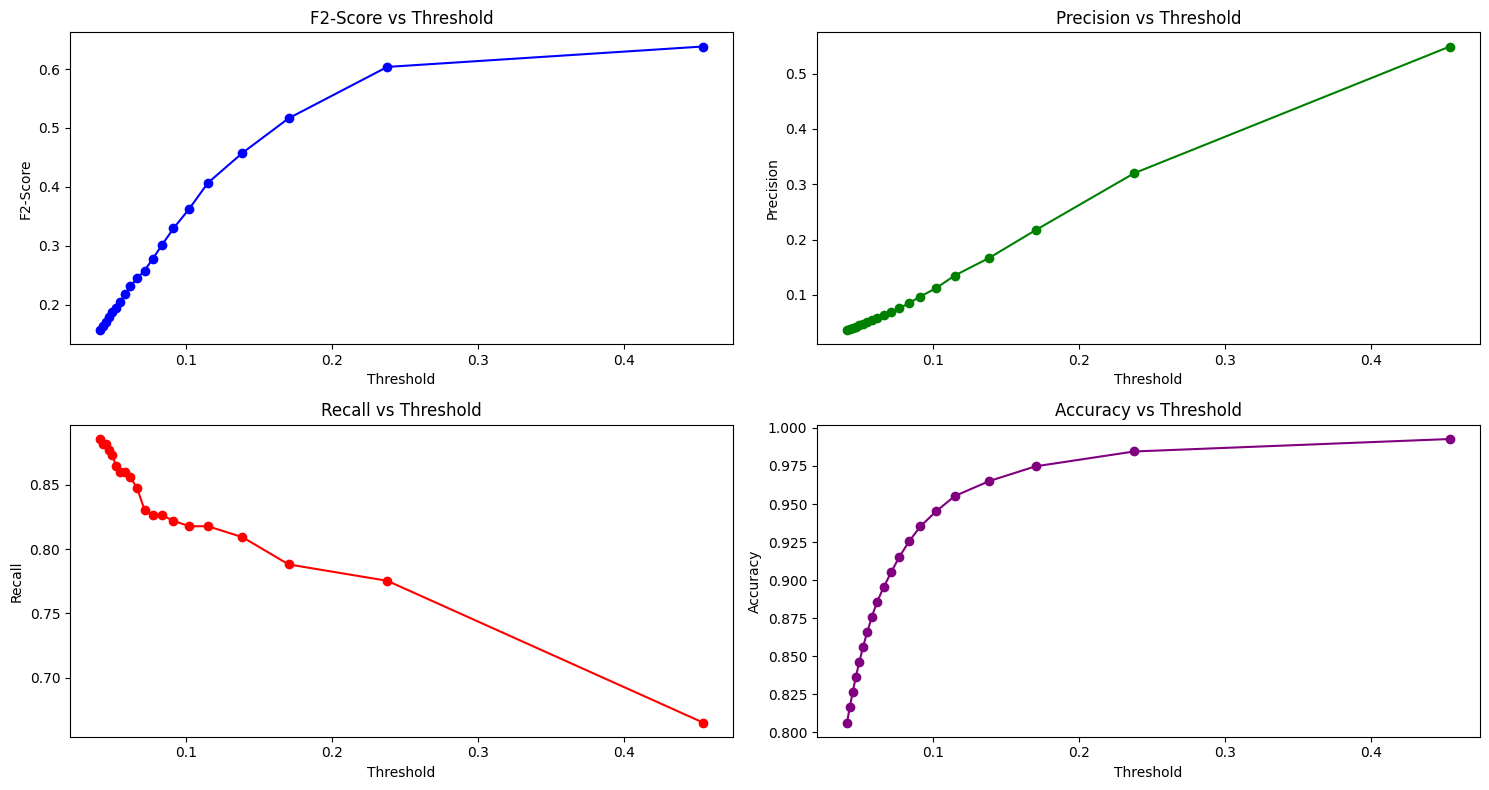

In [29]:
# Visualization
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(threshold_values, f2_scores, marker='o', color='blue')
plt.title('F2-Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F2-Score')

plt.subplot(2, 2, 2)
plt.plot(threshold_values, precisions, marker='o', color='green')
plt.title('Precision vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.plot(threshold_values, recalls, marker='o', color='red')
plt.title('Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.plot(threshold_values, accuracies, marker='o', color='purple')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Conclusion

In this project, we focused on detecting fraudulent transactions using various anomaly detection techniques. After evaluating several models and thresholds, the Probability Density Function (PDF) model emerged as the best-performing model for our dataset. This model outperformed the others in terms of F2-score, which is particularly relevant for fraud detection due to its emphasis on recall.

The F2-Score on the validation set was 0.8047, and on the test set, it increased to 0.8521, demonstrating a significant improvement in performance when applied to unseen data. This indicates that the PDF model was able to balance the trade-off between precision and recall effectively, focusing on minimizing false negatives, which is crucial in fraud detection scenarios.

On the validation set, the recall was 0.8051, which signifies that the model correctly identified approximately 80.5% of fraudulent transactions. Although the precision was slightly lower at 0.7950, the model's high recall ensured that most frauds were detected, even at the cost of slightly increasing false positives. The accuracy remained high at around 99.67% on the validation set and 99.65% on the test set, indicating that the model performed well across the board.

Overall, the PDF-based model demonstrated strong results, providing a robust solution for identifying fraudulent activities while maintaining a balance between precision and recall. Given the nature of fraud detection, where false negatives (missed frauds) are more critical than false positives (false alarms), the PDF model's focus on recall made it the optimal choice for this project.